In [1]:
import os
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torchvision

# training

In [3]:
# Load training features
train_day7_feats = torch.load('train_day7_control.pt')
train_day10_feats = torch.load('train_day10_control.pt')
# Print lengths of feature tensors
print(f"Number of training Day 7 features: {len(train_day7_feats)}")
print(f"Number of training Day 10 features: {len(train_day10_feats)}")
# Print shapes of feature tensors
print(f"Shape of training Day 7 features: {train_day7_feats.shape}")
print(f"Shape of training Day 10 features: {train_day10_feats.shape}")




Number of training Day 7 features: 130
Number of training Day 10 features: 130
Shape of training Day 7 features: torch.Size([130, 512])
Shape of training Day 10 features: torch.Size([130, 512])


C:\Users\k54739\AppData\Local\Temp\ipykernel_28512\3492997598.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_day7_feats = torch.load('train_day7_control.pt')
C:\U

In [4]:
# Ensure the shapes are consistent
assert train_day7_feats.shape == train_day10_feats.shape, "Feature tensors must have the same shape."

In [5]:
train_day7_feats

tensor([[0.0000e+00, 2.8185e-01, 1.7778e+00,  ..., 4.8038e+00, 0.0000e+00,
         5.6796e+00],
        [0.0000e+00, 8.8188e-01, 2.6190e+00,  ..., 2.5169e+00, 7.7244e-01,
         3.9938e-01],
        [0.0000e+00, 1.9313e-03, 4.3643e+00,  ..., 2.1707e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [8.3023e-01, 1.5476e-03, 0.0000e+00,  ..., 3.7646e+00, 1.9595e-01,
         2.9665e+00],
        [0.0000e+00, 1.0555e+00, 5.1104e-02,  ..., 5.6319e-01, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.0051e+00, 4.9191e-01,  ..., 1.5646e-01, 0.0000e+00,
         0.0000e+00]])

In [6]:
# Compute delta (target labels)
delta_feats = train_day10_feats - train_day7_feats  # Element-wise difference

# Prepare data for training
features = train_day7_feats  # Input: Day 7 feature vectors (Shape: [130, 512])
labels = delta_feats   
print(f"Shape of input features (Day 7): {features.shape}")
print(f"Shape of target labels (Delta): {labels.shape}")



Shape of input features (Day 7): torch.Size([130, 512])
Shape of target labels (Delta): torch.Size([130, 512])


# Convert features and labels to NumPy arrays
features_np = features.numpy()  # Shape: [130, 512]
labels_np = labels.numpy()      # Shape: [130, 512]

day10_feats_np = train_day10_feats.numpy()

import matplotlib.pyplot as plt
import numpy as np

# Convert features and labels to NumPy arrays
features_np = features.numpy()  # Shape: [130, 512]
labels_np = labels.numpy()      # Shape: [130, 512]

# Plot Features (Day 7)
plt.figure(figsize=(12, 6))
plt.imshow(features_np, aspect='auto', cmap='viridis')
plt.colorbar(label="Feature Value")
plt.title("Features (Day 7)")
plt.xlabel("Feature Dimensions")
plt.ylabel("Data Points")
plt.show()

# Plot Features (Day 7)
plt.figure(figsize=(12, 6))
plt.imshow(day10_feats_np, aspect='auto', cmap='viridis')
plt.colorbar(label="Feature Value")
plt.title("Features (Day 7)")
plt.xlabel("Feature Dimensions")
plt.ylabel("Data Points")
plt.show()

# Plot Labels (Delta)
plt.figure(figsize=(12, 6))
plt.imshow(labels_np, aspect='auto', cmap='coolwarm')
plt.colorbar(label="Delta Value")
plt.title("Labels (Delta: Day 10 - Day 7)")
plt.xlabel("Feature Dimensions")
plt.ylabel("Data Points")
plt.show()


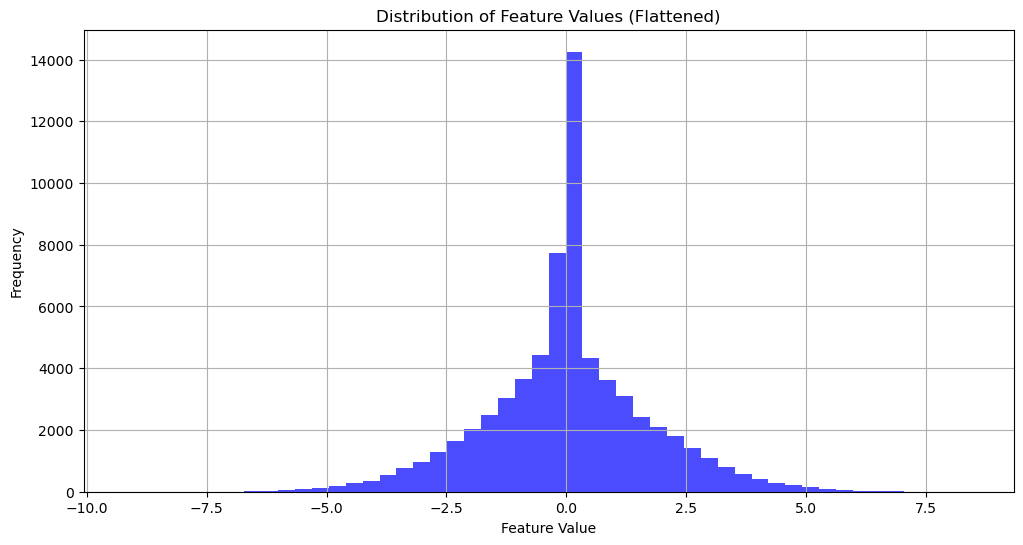

In [30]:
import matplotlib.pyplot as plt

# Flatten features_np to 1D for histogram
labels_flat = labels_np.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(labels_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Feature Values (Flattened)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


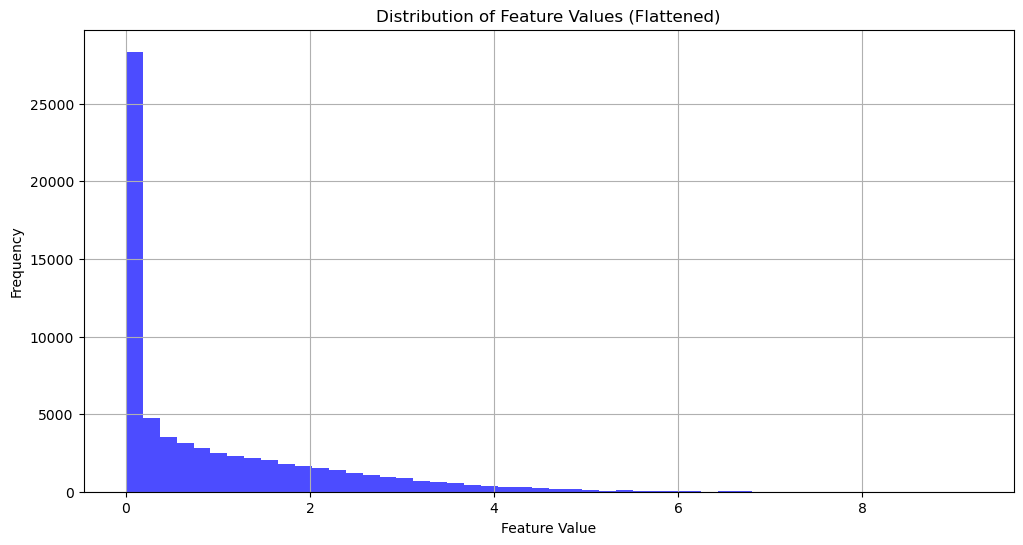

In [34]:
import matplotlib.pyplot as plt

# Flatten features_np to 1D for histogram
features_flat = features_np.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(features_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Feature Values (Flattened)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Scaled

import numpy as np

# Compute Min-Max Scaling for Features
features_min = features_np.min(axis=0)  # Minimum value for each feature
features_max = features_np.max(axis=0)  # Maximum value for each feature
features_scaled = (features_np - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute Z-Score Normalization for Labels
labels_mean = labels_np.mean(axis=0)  # Mean for each label dimension
labels_std = labels_np.std(axis=0)  # Standard deviation for each label dimension
labels_normalized = (labels_np - labels_mean) / labels_std  # Normalize to Z-scores

# Print shapes to confirm
print(f"Features Scaled Shape: {features_scaled.shape}")  # Should be [130, 512]
print(f"Labels Normalized Shape: {labels_normalized.shape}")  # Should be [130, 512]


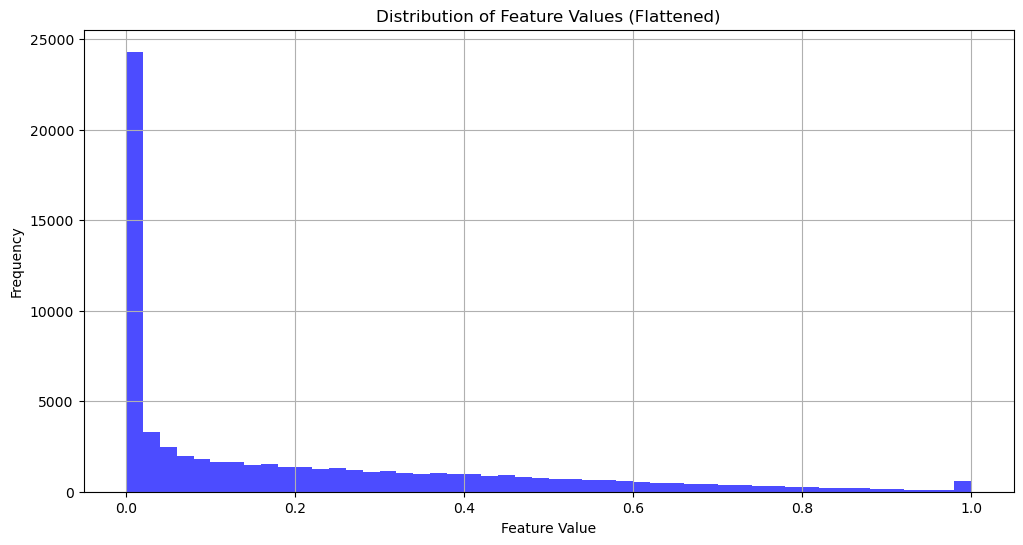

In [9]:
import matplotlib.pyplot as plt

# Flatten features_np to 1D for histogram
features_scaled_flat = features_scaled.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(features_scaled_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Feature Values (Flattened)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



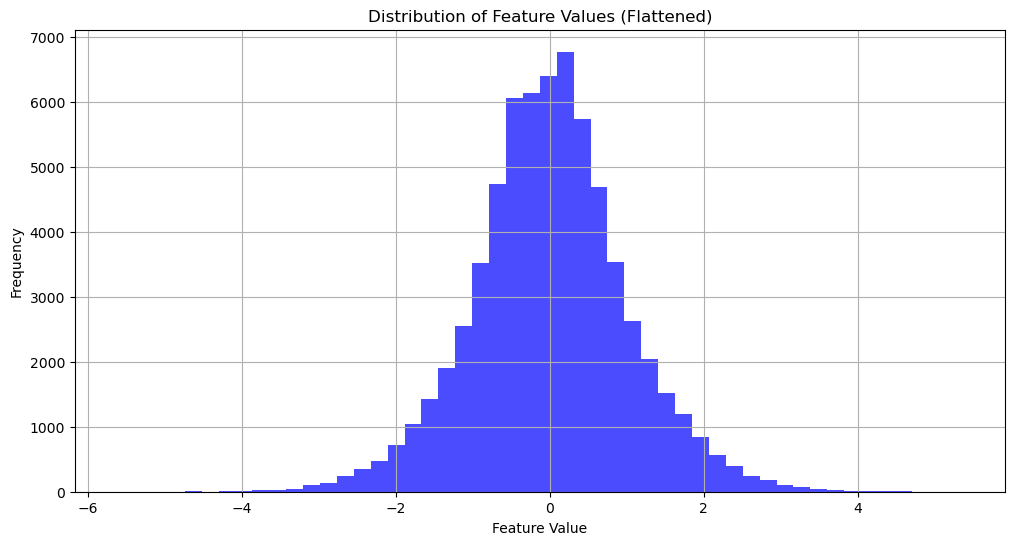

In [10]:
labels_normalized_flat = labels_normalized.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(labels_normalized_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Feature Values (Flattened)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

input_dim = features_scaled.shape[1] 
print(input_dim) # 512
output_dim = labels_normalized.shape[1]
print(output_dim) 

In [7]:
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    def forward(self, x):
        return self.model(x)

In [8]:
model = FeaturePredictor()
criterion = nn.MSELoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [9]:
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset

In [10]:
from torch.utils.data import TensorDataset
optimizer_class = torch.optim.Adam

In [11]:

class EarlyStopping:
    def __init__(self, patience=10, delta=0.0):
        """
        Args:
            patience (int): How many epochs to wait after the last validation loss improvement.
            delta (float): Minimum change in the validation loss to qualify as an improvement.
        """
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.no_improvement_epochs = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.no_improvement_epochs = 0
        else:
            self.no_improvement_epochs += 1
            if self.no_improvement_epochs >= self.patience:
                self.early_stop = True


def cross_validate_with_early_stopping(
    model_class, dataset, criterion, optimizer_class, num_epochs=50, n_splits=5, patience=10, device='cuda'
):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    histories = []
    best_models = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
        print(f"Fold {fold + 1}/{n_splits}")

        # Create subsets for this fold
        train_subset = Subset(dataset, train_idx)
        val_subset = Subset(dataset, val_idx)

        # Create DataLoaders
        train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)

        # Initialize the model, optimizer, and early stopping for this fold
        model = model_class().to(device)
        optimizer = optimizer_class(model.parameters(), lr=1e-4)
        early_stopping = EarlyStopping(patience=patience)

        # Training and validation loop
        history = {'train_loss': [], 'val_loss': []}
        for epoch in range(num_epochs):
            # Training phase
            model.train()
            train_loss = 0.0
            for batch_inputs, batch_targets in train_loader:
                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

                # Forward pass
                outputs = model(batch_inputs)
                loss = criterion(outputs, batch_targets)
                train_loss += loss.item()

                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            train_loss /= len(train_loader)
            history['train_loss'].append(train_loss)

            # Validation phase
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for batch_inputs, batch_targets in val_loader:
                    batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                    outputs = model(batch_inputs)
                    loss = criterion(outputs, batch_targets)
                    val_loss += loss.item()

            val_loss /= len(val_loader)
            history['val_loss'].append(val_loss)

            print(f"Epoch [{epoch + 1}/{num_epochs}] Fold {fold + 1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

            # Check early stopping
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print(f"Early stopping at epoch {epoch + 1} for fold {fold + 1}")
                break

        # Save the best model for this fold
        best_models.append(model.state_dict())
        histories.append(history)

    return histories, best_models



print(features_scaled.shape)
print(labels_normalized.shape)


In [12]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

features_tensor_scaled = (train_day7_feats - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute Z-Score Normalization for Labels
labels_mean = delta_feats.mean(dim=0, keepdim=True)  # Mean for each label dimension
labels_std = delta_feats.std(dim=0, keepdim=True)  # Standard deviation for each label dimension

labels_tensor_normalized = (delta_feats - labels_mean) / labels_std 

In [13]:
# MIN MAX
dataset = TensorDataset(features_tensor_scaled, labels_tensor_normalized)

cv_histories, best_models = cross_validate_with_early_stopping(
    model_class=FeaturePredictor,
    dataset=dataset,
    criterion=nn.MSELoss(),
    optimizer_class=torch.optim.Adam,
    num_epochs=1500,
    patience=500
)


Fold 1/5
Epoch [1/1500] Fold 1, Train Loss: 1.0184, Val Loss: 0.9086
Epoch [2/1500] Fold 1, Train Loss: 1.0334, Val Loss: 0.9086
Epoch [3/1500] Fold 1, Train Loss: 1.0241, Val Loss: 0.9086
Epoch [4/1500] Fold 1, Train Loss: 1.0042, Val Loss: 0.9087
Epoch [5/1500] Fold 1, Train Loss: 1.0095, Val Loss: 0.9088
Epoch [6/1500] Fold 1, Train Loss: 1.0140, Val Loss: 0.9089
Epoch [7/1500] Fold 1, Train Loss: 1.0013, Val Loss: 0.9090
Epoch [8/1500] Fold 1, Train Loss: 1.0047, Val Loss: 0.9090
Epoch [9/1500] Fold 1, Train Loss: 1.0207, Val Loss: 0.9091
Epoch [10/1500] Fold 1, Train Loss: 1.0207, Val Loss: 0.9091
Epoch [11/1500] Fold 1, Train Loss: 1.0158, Val Loss: 0.9093
Epoch [12/1500] Fold 1, Train Loss: 1.0241, Val Loss: 0.9094
Epoch [13/1500] Fold 1, Train Loss: 1.0063, Val Loss: 0.9095
Epoch [14/1500] Fold 1, Train Loss: 1.0121, Val Loss: 0.9096
Epoch [15/1500] Fold 1, Train Loss: 1.0010, Val Loss: 0.9096
Epoch [16/1500] Fold 1, Train Loss: 1.0185, Val Loss: 0.9096
Epoch [17/1500] Fold 1, 

In [14]:
# Example: Average validation loss across folds
avg_val_loss = np.mean([history['val_loss'][-1] for history in cv_histories])
print(f"Average Validation Loss: {avg_val_loss:.4f}")


Average Validation Loss: 0.8364


In [15]:
# Analyze the best results for each fold outside the training function
for fold_idx, history in enumerate(cv_histories):
    # Find the epoch with the lowest validation loss
    best_epoch = int(np.argmin(history['val_loss'])) + 1  # Adding 1 because epochs are 1-indexed
    best_val_loss = history['val_loss'][best_epoch - 1]  # Accessing the loss using 0-based index
    best_train_loss = history['train_loss'][best_epoch - 1]

    print(f"Fold {fold_idx + 1}:")
    print(f"  Best Validation Loss = {best_val_loss:.4f}")
    print(f"  Corresponding Training Loss = {best_train_loss:.4f}")
    print(f"  Best Epoch = {best_epoch}")


Fold 1:
  Best Validation Loss = 0.7142
  Corresponding Training Loss = 0.6035
  Best Epoch = 373
Fold 2:
  Best Validation Loss = 0.8060
  Corresponding Training Loss = 0.5117
  Best Epoch = 424
Fold 3:
  Best Validation Loss = 0.7540
  Corresponding Training Loss = 0.5892
  Best Epoch = 286
Fold 4:
  Best Validation Loss = 0.7463
  Corresponding Training Loss = 0.6423
  Best Epoch = 175
Fold 5:
  Best Validation Loss = 0.7604
  Corresponding Training Loss = 0.4831
  Best Epoch = 464


In [16]:
def plot_loss_curves_separately(cv_histories):
    """
    Plot training and validation loss curves for each fold in separate figures.
    
    Args:
        cv_histories (list): List of loss histories for each fold.
    """
    # Plot Training Loss
    plt.figure(figsize=(10, 6))
    for fold, history in enumerate(cv_histories):
        epochs = range(1, len(history['train_loss']) + 1)  # Dynamically set range
        plt.plot(epochs, history['train_loss'], label=f'Fold {fold + 1} Train Loss')
    plt.title('Training Loss per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Validation Loss
    plt.figure(figsize=(10, 6))
    for fold, history in enumerate(cv_histories):
        epochs = range(1, len(history['val_loss']) + 1)  # Dynamically set range
        plt.plot(epochs, history['val_loss'], label=f'Fold {fold + 1} Val Loss', linestyle='--')
    plt.title('Validation Loss per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


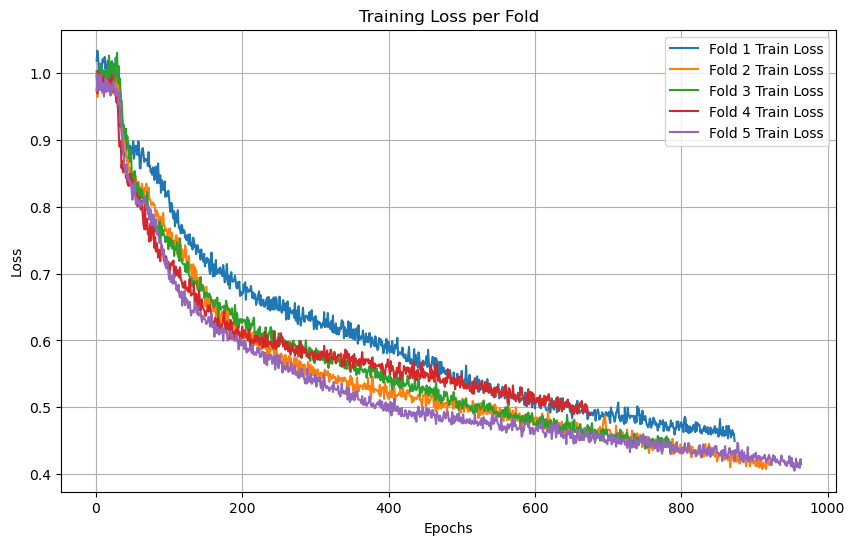

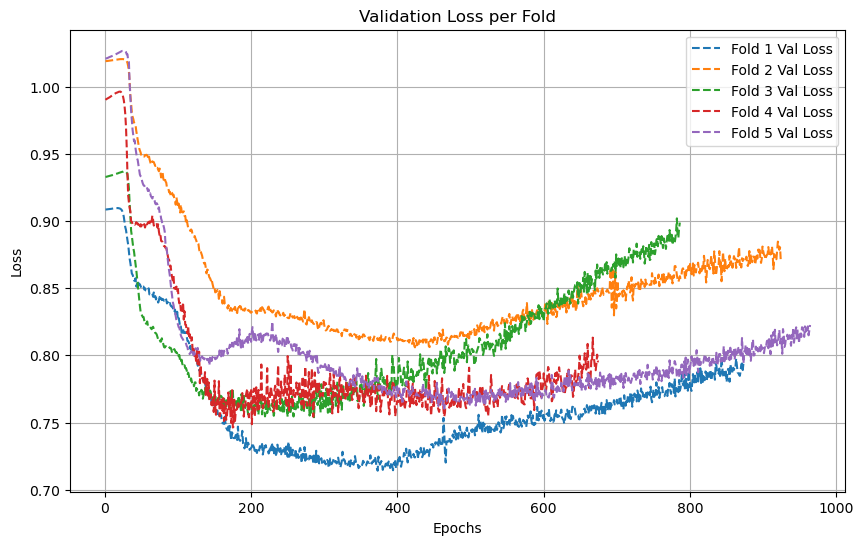

In [17]:
import matplotlib.pyplot as plt
plot_loss_curves_separately(cv_histories)


In [18]:
import os

# Define the directory where models will be saved
save_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save each fold's best model to the directory
for i, model_state in enumerate(best_models):
    save_path = os.path.join(save_dir, f'best_model_fold_{i+1}.pth')
    torch.save(model_state, save_path)

print(f"Models saved to {save_dir}")

Models saved to C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction


In [29]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    def forward(self, x):
        return self.model(x)
    
    # Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the directory where models are saved
load_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction'

# Load a specific fold's best model
model = FeaturePredictor()
load_path = os.path.join(load_dir, 'best_model_fold_1.pth')
model.load_state_dict(torch.load(load_path))
model.to(device)
model.eval()

print(f"Loaded model from {load_path}")


Loaded model from C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\best_model_fold_1.pth


C:\Users\k54739\AppData\Local\Temp\ipykernel_28512\706315478.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path))


# Inference

In [19]:
# Load training features
exploded40_day7 = torch.load('exploded40_day7.pt')
exploded40_day10 = torch.load('exploded40_day10.pt')


C:\Users\k54739\AppData\Local\Temp\ipykernel_28512\2674064639.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  exploded40_day7 = torch.load('exploded40_day7.pt')
C:\Users

In [20]:
# Ensure the shapes are consistent
assert exploded40_day7.shape == exploded40_day10.shape, "Feature tensors must have the same shape."

In [22]:
# Compute delta (target labels)
delta_exp = exploded40_day10 - exploded40_day7  # Element-wise difference

# Prepare data for training
exp_feats = exploded40_day7  # Input: Day 7 feature vectors (Shape: [130, 512])
exp_labels = delta_exp   
print(f"Shape of input features (Day 7): {exp_feats.shape}")
print(f"Shape of target labels (Delta): {exp_labels.shape}")



Shape of input features (Day 7): torch.Size([40, 512])
Shape of target labels (Delta): torch.Size([40, 512])


In [ ]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

features_tensor_scaled = (train_day7_feats - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute Z-Score Normalization for Labels
labels_mean = delta_feats.mean(dim=0, keepdim=True)  # Mean for each label dimension
labels_std = delta_feats.std(dim=0, keepdim=True)  # Standard deviation for each label dimension

labels_tensor_normalized = (delta_feats - labels_mean) / labels_std 

In [24]:
print(features_min.shape)
print(features_max.shape)
print(labels_mean.shape)
print(labels_std.shape)

torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])


In [26]:
exp_feats_tensor_scaled = (exp_feats - features_min) / (features_max - features_min)
labels_tensor_normalized = (exp_labels - labels_mean) / labels_std 


In [30]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
exp_feats_tensor_scaled = exp_feats_tensor_scaled.to(device)
labels_tensor_normalized = labels_tensor_normalized.to(device)

# Initialize the MSE loss function
mse_loss_fn = nn.MSELoss()

# Lists to store metrics for each feature vector
mse_values = []
euclidean_distances = []
cosine_distances = []

# Loop through each feature vector
for i in range(exp_feats_tensor_scaled.shape[0]):
    exp_feats = exp_feats_tensor_scaled[i].unsqueeze(0)  # Shape: [1, 512]
    exp_labels = labels_tensor_normalized[i].unsqueeze(0)  # Shape: [1, 512]
    
    # Get prediction
    with torch.no_grad():
        predicted_exp_labels = model(exp_feats)
    
    # Compute MSE for this feature vector
    mse = mse_loss_fn(predicted_exp_labels, exp_labels).item()
    mse_values.append(mse)
    
    # Compute Euclidean distance
    euclidean_distance = torch.norm(predicted_exp_labels - exp_labels, p=2).item()
    euclidean_distances.append(euclidean_distance)
    
    # Compute Cosine distance
    cosine_distance = 1 - F.cosine_similarity(predicted_exp_labels, exp_labels, dim=1).item()
    cosine_distances.append(cosine_distance)

# Convert metrics to tensors for statistical calculations
mse_values_tensor = torch.tensor(mse_values)
euclidean_distances_tensor = torch.tensor(euclidean_distances)
cosine_distances_tensor = torch.tensor(cosine_distances)




In [37]:
mse_values_tensor.shape

torch.Size([40])

In [38]:
mse_values_tensor

tensor([1.4091, 1.1505, 0.9111, 0.7111, 0.9247, 2.3538, 1.8863, 1.5517, 1.0155,
        1.1341, 1.0722, 1.0915, 1.4367, 2.2058, 2.6702, 3.6934, 0.6553, 1.5398,
        2.0486, 1.4953, 1.3870, 1.0119, 2.3756, 1.7842, 2.5670, 1.1263, 2.1728,
        1.6637, 2.1734, 0.8434, 2.3941, 2.6087, 2.1836, 1.8263, 0.7064, 2.3577,
        1.3882, 1.6260, 2.3828, 1.6836])

In [31]:
import pandas as pd

# Create a DataFrame with the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances  # List of Cosine distances
}
df = pd.DataFrame(data)

file_path = r"C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\explod.csv"  

# Save to a CSV file
df.to_csv(file_path, index=False)  # Save without an index column


In [ ]:
# batch wise is more accurate take that next time.

In [33]:
# Batched inference
with torch.no_grad():
    predicted_labels = model(exp_feats_tensor_scaled)  # Shape: [batch_size, 512]

# Compute metrics in batch
# Mean Squared Error (MSE) for each sample
batch_mse_values = ((predicted_labels - labels_tensor_normalized) ** 2).mean(dim=1).tolist()  # Compute MSE for each sample

# Euclidean distance for each sample
batch_euclidean_distances = torch.norm(predicted_labels - labels_tensor_normalized, p=2, dim=1).tolist()

# Cosine distance for each sample
batch_cosine_distances = (1 - F.cosine_similarity(predicted_labels, labels_tensor_normalized, dim=1)).tolist()


In [44]:
batch_mse_values[0]

1.409135103225708

In [40]:
batch_mse_values == mse_values_tensor

False

In [35]:
euclidean_distances_tensor == batch_euclidean_distances

False

In [36]:
cosine_distances_tensor == batch_cosine_distances

False

In [2]:
import torch

In [7]:
# Load training features
sd_day7 = torch.load('inference_sd_day7.pt')
sd_day10 = torch.load('inference_sd_day10.pt')

C:\Users\k54739\AppData\Local\Temp\ipykernel_26900\3014836348.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd_day7 = torch.load('inference_sd_day7.pt')
C:\Users\k5473

In [8]:
# Ensure the shapes are consistent
assert sd_day10.shape == sd_day7.shape, "Feature tensors must have the same shape."
# Print lengths of feature tensors
print(f"Number of training Day 7 features: {len(sd_day7)}")
print(f"Number of training Day 10 features: {len(sd_day10)}")
# Print shapes of feature tensors
print(f"Shape of training Day 7 features: {sd_day7.shape}")
print(f"Shape of training Day 10 features: {sd_day10.shape}")

Number of training Day 7 features: 29
Number of training Day 10 features: 29
Shape of training Day 7 features: torch.Size([29, 512])
Shape of training Day 10 features: torch.Size([29, 512])


In [9]:
# Compute delta (target labels)
delta_sd = sd_day10 - sd_day7  # Element-wise difference

# Prepare data for training
sd_feats = sd_day7  # Input: Day 7 feature vectors (Shape: [130, 512])
sd_labels = delta_sd   
print(f"Shape of input features (Day 7): {sd_feats.shape}")
print(f"Shape of target labels (Delta): {sd_labels.shape}")



Shape of input features (Day 7): torch.Size([29, 512])
Shape of target labels (Delta): torch.Size([29, 512])


In [13]:
# Load training features
train_day7_feats = torch.load('train_day7_control.pt')
train_day10_feats = torch.load('train_day10_control.pt')
# Compute delta (target labels)
delta_feats = train_day10_feats - train_day7_feats  # Element-wise difference

# Prepare data for training
features = train_day7_feats  # Input: Day 7 feature vectors (Shape: [130, 512])
labels = delta_feats   


C:\Users\k54739\AppData\Local\Temp\ipykernel_26900\3328128239.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_day7_feats = torch.load('train_day7_control.pt')
C:\U

In [14]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

features_tensor_scaled = (train_day7_feats - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute Z-Score Normalization for Labels
labels_mean = delta_feats.mean(dim=0, keepdim=True)  # Mean for each label dimension
labels_std = delta_feats.std(dim=0, keepdim=True)  # Standard deviation for each label dimension

labels_tensor_normalized = (delta_feats - labels_mean) / labels_std 

In [16]:
sd_feats_scaled = (sd_feats - features_min) / (features_max - features_min)
sd_labels_normalized = (sd_labels - labels_mean) / labels_std 

In [22]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import os


In [23]:
class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    def forward(self, x):
        return self.model(x)
    
    # Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the directory where models are saved
load_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction'

# Load a specific fold's best model
model = FeaturePredictor()
load_path = os.path.join(load_dir, 'best_model_fold_1.pth')
model.load_state_dict(torch.load(load_path))
model.to(device)
model.eval()

print(f"Loaded model from {load_path}")


Loaded model from C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\best_model_fold_1.pth


C:\Users\k54739\AppData\Local\Temp\ipykernel_26900\1203716035.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path))


In [24]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
sd_feats_scaled = sd_feats_scaled.to(device)
sd_labels_normalized = sd_labels_normalized.to(device)

# Initialize the MSE loss function
mse_loss_fn = nn.MSELoss()

# Lists to store metrics for each feature vector
mse_values = []
euclidean_distances = []
cosine_distances = []

# Loop through each feature vector
for i in range(sd_feats_scaled.shape[0]):
    sd_feats = sd_feats_scaled[i].unsqueeze(0)  # Shape: [1, 512]
    sd_labels = sd_labels_normalized[i].unsqueeze(0)  # Shape: [1, 512]
    
    # Get prediction
    with torch.no_grad():
        predicted_sd_labels = model(sd_feats)
    
    # Compute MSE for this feature vector
    mse = mse_loss_fn(predicted_sd_labels, sd_labels).item()
    mse_values.append(mse)
    
    # Compute Euclidean distance
    euclidean_distance = torch.norm(predicted_sd_labels - sd_labels, p=2).item()
    euclidean_distances.append(euclidean_distance)
    
    # Compute Cosine distance
    cosine_distance = 1 - F.cosine_similarity(predicted_sd_labels, sd_labels, dim=1).item()
    cosine_distances.append(cosine_distance)

# Convert metrics to tensors for statistical calculations
mse_values_tensor = torch.tensor(mse_values)
euclidean_distances_tensor = torch.tensor(euclidean_distances)
cosine_distances_tensor = torch.tensor(cosine_distances)




In [25]:
import pandas as pd

# Create a DataFrame with the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances  # List of Cosine distances
}
df = pd.DataFrame(data)

file_path = r"C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\sd.csv"  

# Save to a CSV file
df.to_csv(file_path, index=False)  # Save without an index column


In [ ]:
# turn into func

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def compute_metrics_per_vector(model, input_features, target_labels, device='cpu'):
    """
    Compute MSE, Euclidean, and Cosine distances for each feature vector.

    Args:
    - model (torch.nn.Module): The trained model used for prediction.
    - input_features (torch.Tensor): Scaled input feature tensor of shape [N, D], where N is the number of samples and D is the feature size.
    - target_labels (torch.Tensor): Normalized labels tensor of shape [N, D].
    - device (str): The device to perform computations on ('cpu' or 'cuda').

    Returns:
    - mse_values_tensor (torch.Tensor): Tensor containing MSE values for each feature vector.
    - euclidean_distances_tensor (torch.Tensor): Tensor containing Euclidean distances for each feature vector.
    - cosine_distances_tensor (torch.Tensor): Tensor containing Cosine distances for each feature vector.
    """
    # Ensure the tensors and model are on the correct device
    model = model.to(device)
    input_features = input_features.to(device)
    target_labels = target_labels.to(device)

    # Set model to evaluation mode
    model.eval()

    # Initialize the MSE loss function
    mse_loss_fn = nn.MSELoss()

    # Lists to store metrics for each feature vector
    mse_values = []
    euclidean_distances = []
    cosine_distances = []

    # Loop through each feature vector
    for i in range(input_features.shape[0]):
        current_feats = input_features[i].unsqueeze(0)  # Shape: [1, D]
        current_labels = target_labels[i].unsqueeze(0)  # Shape: [1, D]

        # Get prediction
        with torch.no_grad():
            predicted_labels = model(current_feats)

        # Compute MSE for this feature vector
        mse = mse_loss_fn(predicted_labels, current_labels).item()
        mse_values.append(mse)

        # Compute Euclidean distance
        euclidean_distance = torch.norm(predicted_labels - current_labels, p=2).item()
        euclidean_distances.append(euclidean_distance)

        # Compute Cosine distance
        cosine_distance = 1 - F.cosine_similarity(predicted_labels, current_labels, dim=1).item()
        cosine_distances.append(cosine_distance)

    # Convert metrics to tensors for statistical calculations
    mse_values_tensor = torch.tensor(mse_values)
    euclidean_distances_tensor = torch.tensor(euclidean_distances)
    cosine_distances_tensor = torch.tensor(cosine_distances)

    return mse_values_tensor, euclidean_distances_tensor, cosine_distances_tensor

# Example usage:
# Assume model, sd_feats_scaled, sd_labels_normalized, and device are already defined
mse_values, euclidean_distances, cosine_distances = compute_metrics_per_vector(model, sd_feats_scaled, sd_labels_normalized, device=device)


# control

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Load training features
train_day7_feats = torch.load('train_day7_control.pt')
train_day10_feats = torch.load('train_day10_control.pt')


C:\Users\k54739\AppData\Local\Temp\ipykernel_25364\2729202165.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_day7_feats = torch.load('train_day7_control.pt')
C:\U

In [4]:
# Compute delta (target labels)
delta_feats = train_day10_feats - train_day7_feats  # Element-wise difference

# Prepare data for training
features = train_day7_feats  # Input: Day 7 feature vectors (Shape: [130, 512])
labels = delta_feats   
print(f"Shape of input features (Day 7): {features.shape}")
print(f"Shape of target labels (Delta): {labels.shape}")



Shape of input features (Day 7): torch.Size([130, 512])
Shape of target labels (Delta): torch.Size([130, 512])


In [8]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

train_feats_scaled = (train_day7_feats - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute Z-Score Normalization for Labels
labels_mean = delta_feats.mean(dim=0, keepdim=True)  # Mean for each label dimension
labels_std = delta_feats.std(dim=0, keepdim=True)  # Standard deviation for each label dimension

train_labels_normalized = (delta_feats - labels_mean) / labels_std 

In [6]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import os


In [7]:
class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    def forward(self, x):
        return self.model(x)
    
    # Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the directory where models are saved
load_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction'

# Load a specific fold's best model
model = FeaturePredictor()
load_path = os.path.join(load_dir, 'best_model_fold_1.pth')
model.load_state_dict(torch.load(load_path))
model.to(device)
model.eval()

print(f"Loaded model from {load_path}")


Loaded model from C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\best_model_fold_1.pth


C:\Users\k54739\AppData\Local\Temp\ipykernel_25364\1203716035.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path))


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def compute_metrics_per_vector(model, input_features, target_labels, device='cuda'):
    """
    Compute MSE, Euclidean, and Cosine distances for each feature vector.

    Args:
    - model (torch.nn.Module): The trained model used for prediction.
    - input_features (torch.Tensor): Scaled input feature tensor of shape [N, D], where N is the number of samples and D is the feature size.
    - target_labels (torch.Tensor): Normalized labels tensor of shape [N, D].
    - device (str): The device to perform computations on ('cpu' or 'cuda').

    Returns:
    - mse_values_tensor (torch.Tensor): Tensor containing MSE values for each feature vector.
    - euclidean_distances_tensor (torch.Tensor): Tensor containing Euclidean distances for each feature vector.
    - cosine_distances_tensor (torch.Tensor): Tensor containing Cosine distances for each feature vector.
    """
    # Ensure the tensors and model are on the correct device
    model = model.to(device)
    input_features = input_features.to(device)
    target_labels = target_labels.to(device)

    # Set model to evaluation mode
    model.eval()

    # Initialize the MSE loss function
    mse_loss_fn = nn.MSELoss()

    # Lists to store metrics for each feature vector
    mse_values = []
    euclidean_distances = []
    cosine_distances = []

    # Loop through each feature vector
    for i in range(input_features.shape[0]):
        current_feats = input_features[i].unsqueeze(0)  # Shape: [1, D]
        current_labels = target_labels[i].unsqueeze(0)  # Shape: [1, D]

        # Get prediction
        with torch.no_grad():
            predicted_labels = model(current_feats)

        # Compute MSE for this feature vector
        mse = mse_loss_fn(predicted_labels, current_labels).item()
        mse_values.append(mse)

        # Compute Euclidean distance
        euclidean_distance = torch.norm(predicted_labels - current_labels, p=2).item()
        euclidean_distances.append(euclidean_distance)

        # Compute Cosine distance
        cosine_distance = 1 - F.cosine_similarity(predicted_labels, current_labels, dim=1).item()
        cosine_distances.append(cosine_distance)

    # Convert metrics to tensors for statistical calculations
    #mse_values_tensor = torch.tensor(mse_values)
    #euclidean_distances_tensor = torch.tensor(euclidean_distances)
    #cosine_distances_tensor = torch.tensor(cosine_distances)

    return mse_values, euclidean_distances, cosine_distances, 

# Example usage:
# Assume model, sd_feats_scaled, sd_labels_normalized, and device are already defined
mse_values, euclidean_distances, cosine_distances = compute_metrics_per_vector(model, train_feats_scaled, train_labels_normalized, device=device)


In [19]:
import pandas as pd

# Create a DataFrame with the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances  # List of Cosine distances
}
df = pd.DataFrame(data)

file_path = r"C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\control.csv"  

# Save to a CSV file
df.to_csv(file_path, index=False)  # Save without an index column


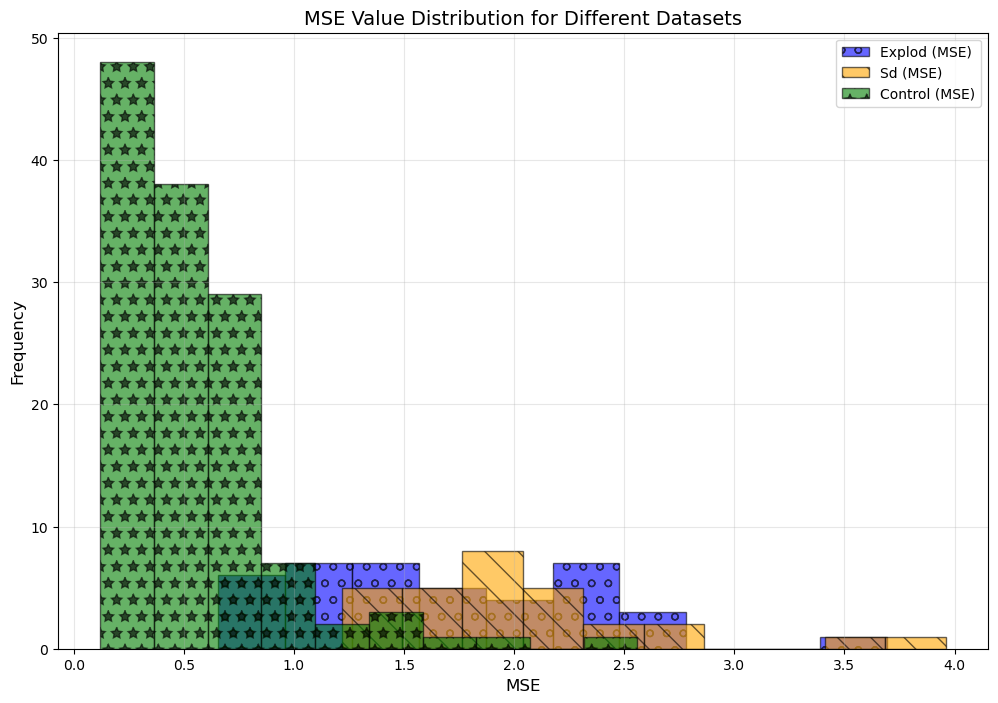

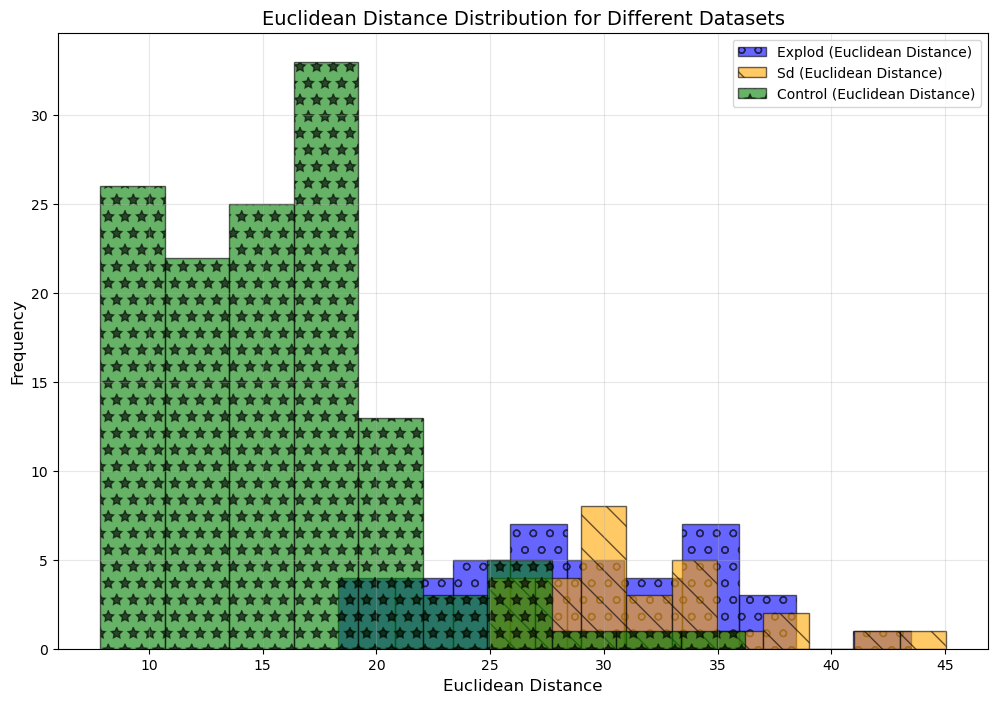

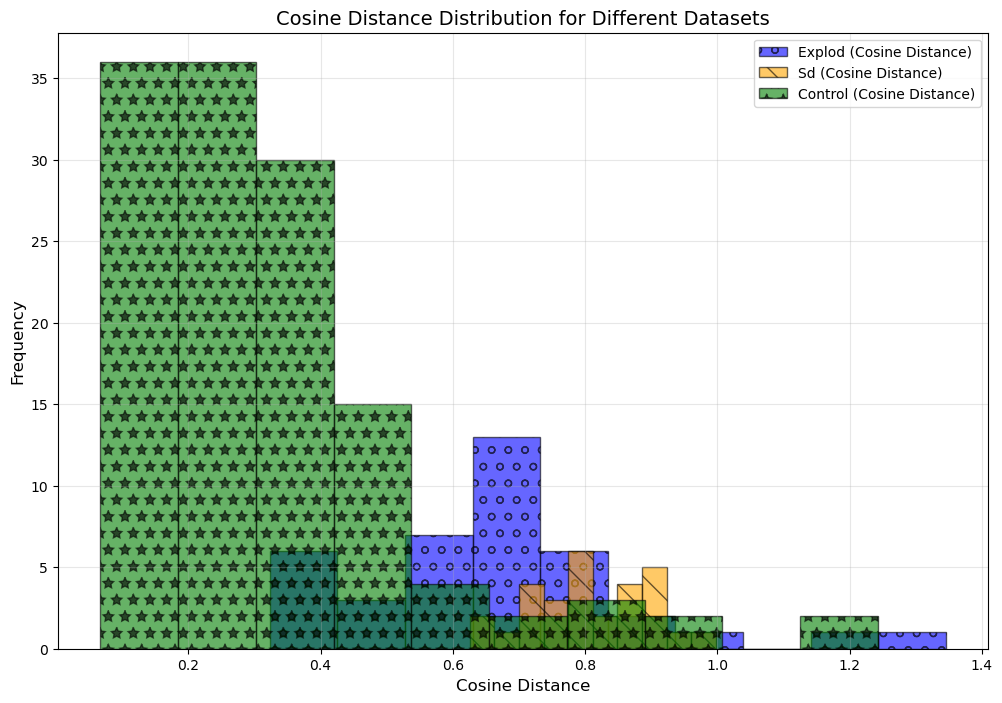

In [22]:
import matplotlib.pyplot as plt
import torch
import pandas as pd

folder_path = r"C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction"

# Load datasets
datasets = {
    "explod": pd.read_csv(os.path.join(folder_path, "explod.csv")),
    "sd": pd.read_csv(os.path.join(folder_path, "sd.csv")),
    "control": pd.read_csv(os.path.join(folder_path, "control.csv"))
}

# Prepare metrics
metrics = {
    "MSE": "MSE",
    "Euclidean Distance": "Euclidean Distance",
    "Cosine Distance": "Cosine Distance"
}

# Define colors and hatching patterns for each dataset
colors = {"explod": "blue", "sd": "orange", "control": "green"}
hatch_styles = {"explod": "o", "sd": "\\", "control": "*"}

# Plotting function
def plot_metric_distribution(metrics, title, xlabel, metric_key, bins=20):
    plt.figure(figsize=(12, 8))
    
    # Plot each dataset
    for dataset_name, df in datasets.items():
        values = df[metric_key].tolist()
        plt.hist(
            values,
            bins=bins,
            alpha=0.6,
            label=f"{dataset_name.capitalize()} ({metric_key})",
            color=colors[dataset_name],
            hatch=hatch_styles[dataset_name],
            edgecolor="black"
        )
    
    # Customize plot
    plt.title(f"{title} for Different Datasets", fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()

# Plot MSE, Euclidean, and Cosine Distance distributions
plot_metric_distribution(metrics, "MSE Value Distribution", "MSE", "MSE", bins=10)
plot_metric_distribution(metrics, "Euclidean Distance Distribution", "Euclidean Distance", "Euclidean Distance", bins=10)
plot_metric_distribution(metrics, "Cosine Distance Distribution", "Cosine Distance", "Cosine Distance", bins=10)
